In [1]:
import cv2
import numpy as np
import skimage

from src.processing import ImageMatcher, Homographer, BoardMapper
from src.display import showarray

In [2]:
def draw_bbox(frame, bbox, color=(255, 255, 255)):
  p1 = (int(bbox[0]), int(bbox[1]))
  p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
  cv2.rectangle(frame, p1, p2, color, 2, 1)

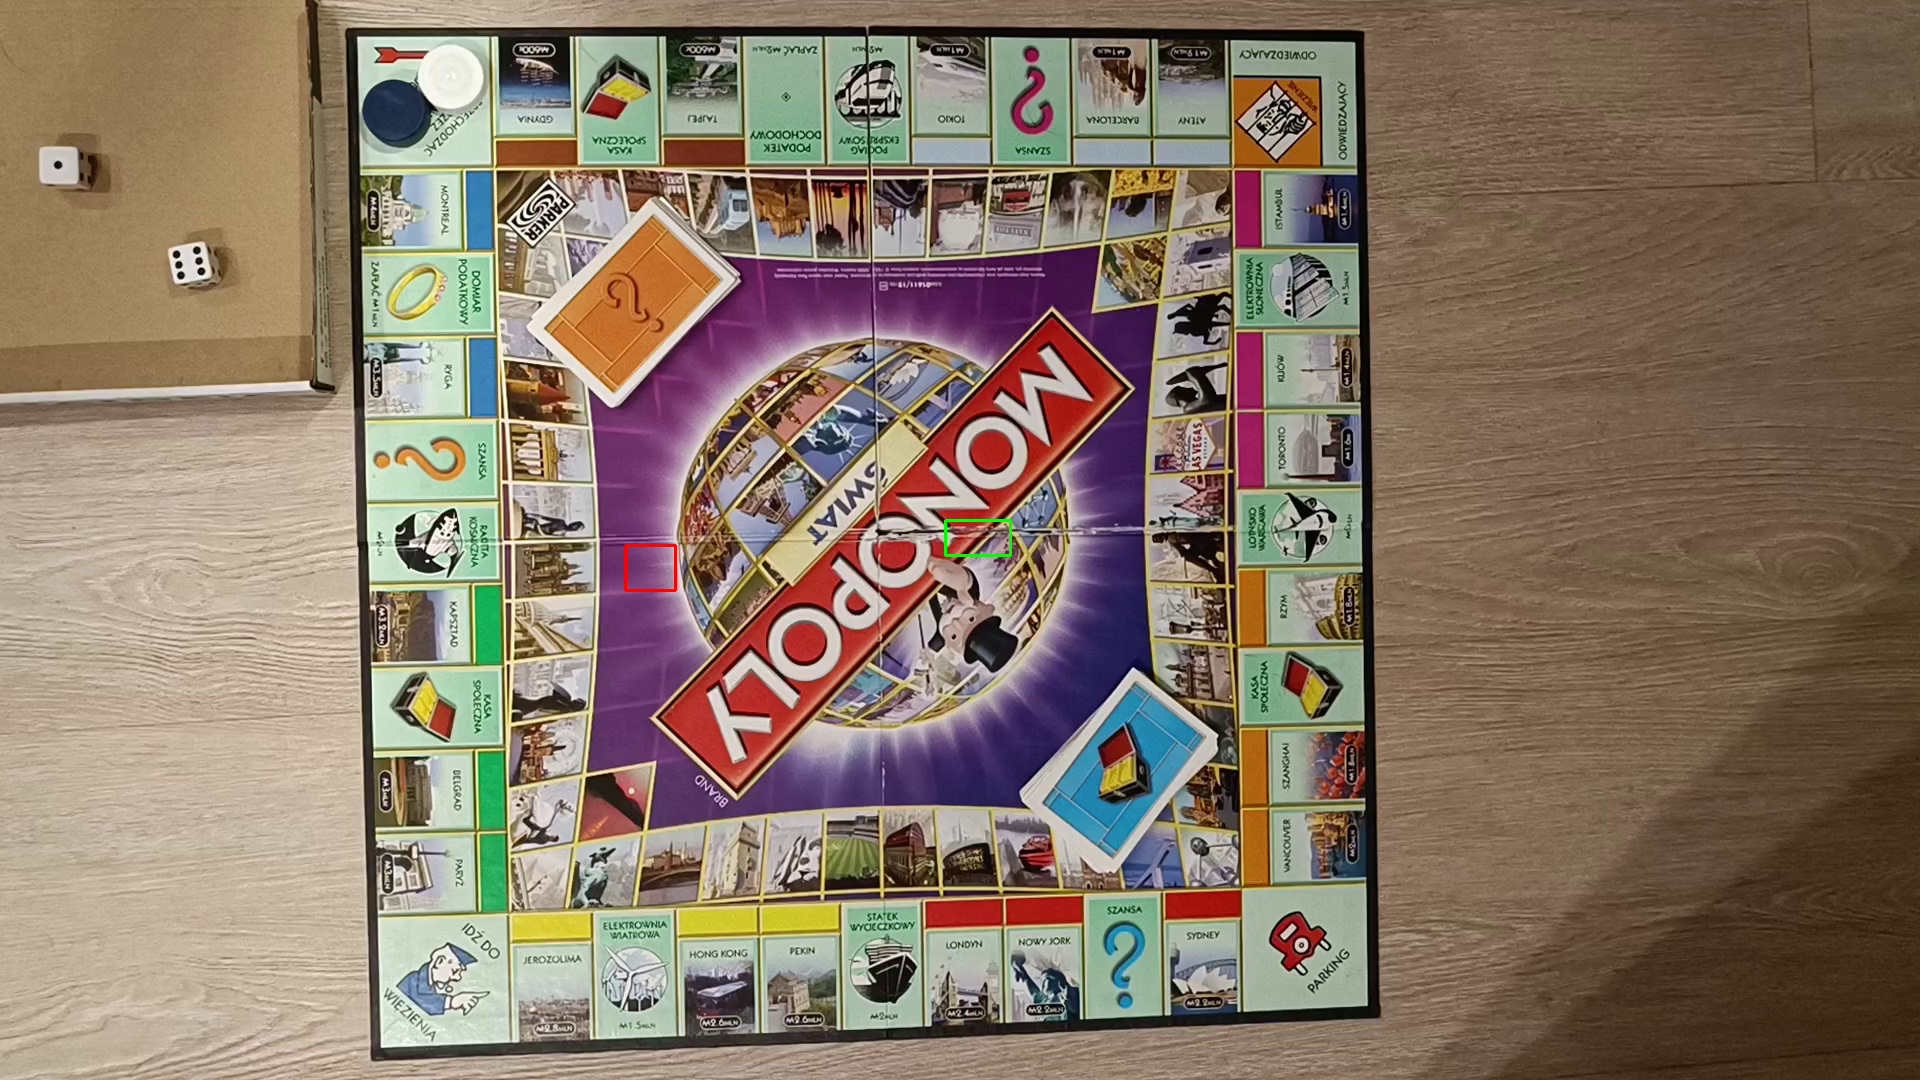

In [3]:
TRACKER_CREATE_MAP = {
    "BOOSTING": cv2.legacy.TrackerBoosting_create,      # Bad and very slow
    "MIL": cv2.TrackerMIL_create,                       # Best but slow
    "KCF": cv2.TrackerKCF_create,                       # Very bad but very fast
    "TLD": cv2.legacy.TrackerTLD_create,                # Bad and very slow
    "MEDIANFLOW": cv2.legacy.TrackerMedianFlow_create,  # Average and very fast (Best ?)
    "GOTURN": cv2.TrackerGOTURN_create,                 # Very bad and very slow
    "MOSSE": cv2.legacy.TrackerMOSSE_create,            # Very bad but extremely fast
    "CSRT": cv2.legacy.TrackerCSRT_create,              # Good but slow (Second best ?)
}

tracker_hat = TRACKER_CREATE_MAP["CSRT"]()
tracker_car = TRACKER_CREATE_MAP["CSRT"]()
capture = cv2.VideoCapture("data/recordings/Easy_1.mp4")
ret, frame = capture.read()
car_bbox = (945, 520, 65, 35)
hat_bbox = (625, 545, 50, 45)
tracker_car.init(frame, car_bbox)
tracker_hat.init(frame, hat_bbox)
draw_bbox(frame, car_bbox, color=(0, 255, 0))
draw_bbox(frame, hat_bbox, color=(0, 0, 255))
showarray(frame)
capture.release()

In [4]:
capture = cv2.VideoCapture("data/recordings/Easy_1.mp4")
cv2.namedWindow("Feed", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Feed", 400, 800)
while True:
    ret, frame = capture.read()
    if not ret:
        break
    success, car_bbox = tracker_car.update(frame)
    if success:
        draw_bbox(frame, car_bbox, color=(0, 255, 0))
    success, hat_bbox = tracker_hat.update(frame)
    if success:
        draw_bbox(frame, hat_bbox, color=(0, 0, 255))
    cv2.imshow('Feed', frame) 
    if cv2.waitKey(3) & 0xFF == ord('q'):
        break
capture.release()
cv2.destroyAllWindows()